# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [15]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

In [16]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [17]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm
X = df[['x']]
y = df['y']

## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [18]:
# Your code here - prepare quadratic data and fit a model
# Create quadratic features manually
df['x'] = X
df['x_squared'] = X**2

# Define the feature matrix and target variable
X_quad = sm.add_constant(df[['x', 'x_squared']])  # add constant (intercept)
model_quad = sm.OLS(y, X_quad).fit()

# Print model summary
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2366
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.790
Time:                        04:50:39   Log-Likelihood:                -299.64
No. Observations:                 100   AIC:                             605.3
Df Residuals:                      97   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      1.446      0.078      0.9

In [19]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Evaluate Adjusted R-squared and p-values
adj_r_squared = model_quad.rsquared_adj
p_values = model_quad.pvalues

print("Adjusted R-squared:", adj_r_squared)
print("\nCoefficient p-values:\n", p_values)

Adjusted R-squared: -0.015664188856822747

Coefficient p-values:
 const        0.938055
x            0.893974
x_squared    0.967420
dtype: float64


In [20]:
# Your written answer here - summarize findings
""" 
The adjusted R-squared of -0.0157 suggests that the quadratic model does not explain the variability in the data—in fact, it performs worse than a simple horizontal line (mean of y).

Additionally, the p-values for all coefficients (const, x, and x_squared) are very high (all > 0.89), which means none of the terms are statistically significant predictors of the outcome.

The quadratic model fits the data poorly.

There's no evidence that x or x² significantly predict y.

We may need to explore higher-degree polynomial models or consider non-polynomial models to capture the non-linear shape in the data.

"""

" \nThe adjusted R-squared of -0.0157 suggests that the quadratic model does not explain the variability in the data—in fact, it performs worse than a simple horizontal line (mean of y).\n\nAdditionally, the p-values for all coefficients (const, x, and x_squared) are very high (all > 0.89), which means none of the terms are statistically significant predictors of the outcome.\n\nThe quadratic model fits the data poorly.\n\nThere's no evidence that x or x² significantly predict y.\n\nWe may need to explore higher-degree polynomial models or consider non-polynomial models to capture the non-linear shape in the data.\n\n"

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [21]:
# Your code here - prepare 4th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures

# Generate 4th degree polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)  # exclude bias because we'll add constant manually
X_poly_4 = poly.fit_transform(X.values.reshape(-1, 1))

# Convert to DataFrame for better readability
X_poly_4_df = pd.DataFrame(X_poly_4, columns=['x', 'x2', 'x3', 'x4'])

# Add constant for intercept
X_poly_4_df = sm.add_constant(X_poly_4_df)

# Fit the model
model_poly4 = sm.OLS(y, X_poly_4_df).fit()

# Print summary
print(model_poly4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.38
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           2.24e-17
Time:                        04:50:39   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             522.0
Df Residuals:                      95   BIC:                             535.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8590      1.514      3.870      0.0

In [22]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Evaluate Adjusted R-squared and p-values
adj_r_squared_4 = model_poly4.rsquared_adj
p_values_4 = model_poly4.pvalues

print("Adjusted R-squared (4th Degree):", adj_r_squared_4)
print("\nCoefficient p-values:\n", p_values_4)

Adjusted R-squared (4th Degree): 0.5667967820112225

Coefficient p-values:
 const    1.995047e-04
x        1.738988e-10
x2       3.340296e-14
x3       1.715785e-16
x4       7.408453e-18
dtype: float64


In [23]:
# Your written answer here - summarize findings
""" 
The model overally explains about 58.4% of the variance in target which  is an improvement from the first model which explained about 0.5% of the variance
The adjusted R-squared is 0.567, a substantial improvement over the quadratic model’s negative adjusted R-squared. This indicates that the 4th degree polynomial model explains a meaningful portion of the variance in the data.

All coefficient p-values are extremely small (much less than 0.05), meaning that each term from x0 to x4 is statistically significant in predicting the target variable.

The 4th degree polynomial model is a much better fit for the data compared to the quadratic model. It captures the non-linear shape effectively and includes statistically significant terms, making it a strong candidate for modeling the relationship between x and y.
"""


' \nThe model overally explains about 58.4% of the variance in target which  is an improvement from the first model which explained about 0.5% of the variance\nThe adjusted R-squared is 0.567, a substantial improvement over the quadratic model’s negative adjusted R-squared. This indicates that the 4th degree polynomial model explains a meaningful portion of the variance in the data.\n\nAll coefficient p-values are extremely small (much less than 0.05), meaning that each term from x0 to x4 is statistically significant in predicting the target variable.\n\nThe 4th degree polynomial model is a much better fit for the data compared to the quadratic model. It captures the non-linear shape effectively and includes statistically significant terms, making it a strong candidate for modeling the relationship between x and y.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [24]:
# Your code here - prepare 8th degree polynomial data and fit a model
#Generate 8th degree PolynomialFeatures
poly_8 = PolynomialFeatures(degree = 8, include_bias= False)
X_poly_8 = poly_8.fit_transform(X.values.reshape(-1,1))

# convert to a dataframe for better readability
X_poly_8_df = pd.DataFrame(X_poly_8, columns=['x','x2','x3','x4','x5','x6','x7','x8'])

# Add constant for the y-intercept
X_poly_8_df = sm.add_constant(X_poly_8_df)

# Build the model and fit 
model_poly8 = sm.OLS(y,X_poly_8_df).fit()

# print the summarry
print(model_poly8.summary())





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     56.95
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           3.93e-32
Time:                        04:50:39   Log-Likelihood:                -210.25
No. Observations:                 100   AIC:                             438.5
Df Residuals:                      91   BIC:                             461.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6335      1.550      0.409      0.6

In [25]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
adj_R_Squared8 = model_poly8.rsquared_adj
p_values8 = model_poly8.pvalues

print("Adjusted R-squared(8th Degree):",adj_R_Squared8)
print("\nCoefficient p-values:\n",p_values8)

Adjusted R-squared(8th Degree): 0.8188676291759994

Coefficient p-values:
 const    0.683776
x        0.618134
x2       0.371163
x3       0.199162
x4       0.144776
x5       0.157523
x6       0.225536
x7       0.357352
x8       0.554141
dtype: float64


In [26]:
# Your written answer here - summarize findings
""" 
The adjusted R-squared is 0.819, which indicates a strong fit. This model explains over 81% of the variance in the target variable — significantly better than the 4th degree model (which had ~56.7%).

However, none of the polynomial terms are statistically significant (all p-values > 0.14), including the intercept. This is unusual for such a high adjusted R² and suggests that:

The model might be overfitting — capturing noise rather than meaningful signal.

The dataset might not be large enough to confidently estimate so many parameters.

Multicollinearity among polynomial terms (especially with higher degrees) could be inflating the standard errors.

The fit is strong, but the lack of statistically significant terms is a red flag.

This model may look good numerically but may not generalize well.

The 4th degree model still offers a solid balance of good fit and statistically significant predictors.
"""


' \nThe adjusted R-squared is 0.819, which indicates a strong fit. This model explains over 81% of the variance in the target variable — significantly better than the 4th degree model (which had ~56.7%).\n\nHowever, none of the polynomial terms are statistically significant (all p-values > 0.14), including the intercept. This is unusual for such a high adjusted R² and suggests that:\n\nThe model might be overfitting — capturing noise rather than meaningful signal.\n\nThe dataset might not be large enough to confidently estimate so many parameters.\n\nMulticollinearity among polynomial terms (especially with higher degrees) could be inflating the standard errors.\n\nThe fit is strong, but the lack of statistically significant terms is a red flag.\n\nThis model may look good numerically but may not generalize well.\n\nThe 4th degree model still offers a solid balance of good fit and statistically significant predictors.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

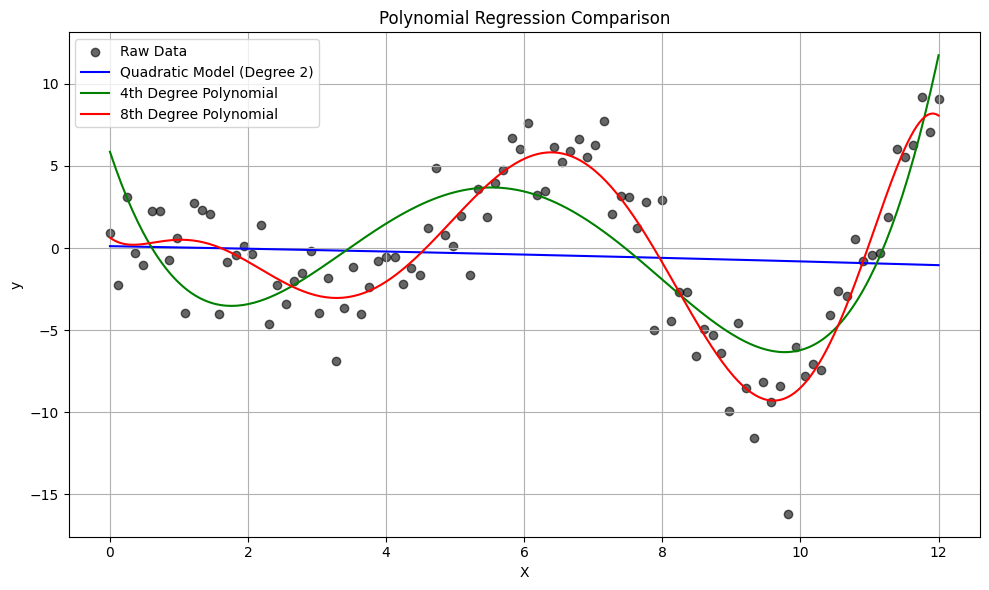

In [31]:
# Your code here
# Create a smooth range of x values for plotting the curves
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Quadratic model prediction
quad_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_range)
quad_features_df = sm.add_constant(pd.DataFrame(quad_features, columns=['x', 'x2']))
y_quad_pred = model_quad.predict(quad_features_df)

# 4th degree model prediction
poly4_features = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_range)
poly4_features_df = sm.add_constant(pd.DataFrame(poly4_features, columns=['x', 'x2', 'x3', 'x4']))
y_poly4_pred = model_poly4.predict(poly4_features_df)

# 8th degree model prediction
poly8_features = PolynomialFeatures(degree=8, include_bias=False).fit_transform(x_range)
poly8_features_df = sm.add_constant(pd.DataFrame(poly8_features, columns=[f'x{i}' if i > 1 else 'x' for i in range(1, 9)]))
y_poly8_pred = model_poly8.predict(poly8_features_df)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', alpha=0.6, label='Raw Data')

plt.plot(x_range, y_quad_pred, color='blue', label='Quadratic Model (Degree 2)')
plt.plot(x_range, y_poly4_pred, color='green', label='4th Degree Polynomial')
plt.plot(x_range, y_poly8_pred, color='red', label='8th Degree Polynomial')

plt.title('Polynomial Regression Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [28]:
# Your written answer here
""" 
Based on both statistical metrics and the visual fit, the 4th degree polynomial model is the most appropriate choice.

In terms of adjusted R-squared, the 4th degree model achieves a value of 0.567, which indicates a solid fit to the data. While the 8th degree model reports a higher adjusted R-squared of 0.819, it comes at the cost of potential overfitting. The quadratic model, with a negative adjusted R-squared, clearly fails to capture the structure in the data.

Looking at coefficient significance, the 4th degree model outperforms the 8th degree model. All coefficients in the 4th degree model are statistically significant, meaning each term contributes meaningfully to the model. In contrast, none of the 8th degree model’s terms are statistically significant, despite its higher R². This suggests that it may be fitting random noise rather than true patterns.

Visually, the green curve (4th degree) closely follows the overall trend in the scatter plot without overreacting to small fluctuations. The red curve (8th degree) shows excessive wiggles and sharp turns, which is a classic sign of overfitting. The blue curve (quadratic) is almost flat and fails to capture the non-linear nature of the data.

In summary, the 4th degree model provides the best balance between fit, interpretability, and statistical reliability. It captures the complexity of the data without overfitting, making it the most robust model of the three.
"""

' \nBased on both statistical metrics and the visual fit, the 4th degree polynomial model is the most appropriate choice.\n\nIn terms of adjusted R-squared, the 4th degree model achieves a value of 0.567, which indicates a solid fit to the data. While the 8th degree model reports a higher adjusted R-squared of 0.819, it comes at the cost of potential overfitting. The quadratic model, with a negative adjusted R-squared, clearly fails to capture the structure in the data.\n\nLooking at coefficient significance, the 4th degree model outperforms the 8th degree model. All coefficients in the 4th degree model are statistically significant, meaning each term contributes meaningfully to the model. In contrast, none of the 8th degree model’s terms are statistically significant, despite its higher R². This suggests that it may be fitting random noise rather than true patterns.\n\nVisually, the green curve (4th degree) closely follows the overall trend in the scatter plot without overreacting to 

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 